In [ ]:
# exploring if the previous acc_diff plays a role in the winrate oft he current game

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('tyler_24h.csv')
df['prev_acc_diff'] = df['acc_diff'].shift(1)
df['prev_acc'] = df['player_acc'].shift(1)
df.head()

,unix,player_elo,opp_elo,opp_name,opp_30d,elo_diff,color,player_acc,opp_acc,acc_diff,won,num_reque,time_since_prev,opp_num_reque,opp_time_since_prev,prev_acc_diff,prev_acc
0,1696185098,1090,1063,Quarini,249,27,False,69.43,62.25,7.18,1.0,0,0,2.0,325.0,NaN,NaN
1,1696186352,1097,1091,hgarciarod,339,6,True,78.20,69.40,8.80,1.0,0,1254,2.0,1108.0,7.18,69.43
2,1696187659,1105,1139,HERFJERF,113,-34,False,92.66,80.43,12.23,1.0,0,1307,0.0,48092.0,8.80,78.20
3,1696188843,1114,1091,olas109,178,23,True,67.25,60.95,6.30,NaN,1,1184,8.0,977.0,12.23,92.66
4,1696189372,1113,1105,InkLv,116,8,False,83.82,72.41,11.41,1.0,2,529,1.0,557.0,6.30,67.25


In [11]:
df = df.dropna()
df.head(15)

,unix,player_elo,opp_elo,opp_name,opp_30d,elo_diff,color,player_acc,opp_acc,acc_diff,won,num_reque,time_since_prev,opp_num_reque,opp_time_since_prev,prev_acc_diff,prev_acc
1,1696186352,1097,1091,hgarciarod,339,6,True,78.20,69.40,8.80,1.0,0,1254,2.0,1108.0,7.18,69.43
2,1696187659,1105,1139,HERFJERF,113,-34,False,92.66,80.43,12.23,1.0,0,1307,0.0,48092.0,8.80,78.20
4,1696189372,1113,1105,InkLv,116,8,False,83.82,72.41,11.41,1.0,2,529,1.0,557.0,6.30,67.25
5,1696190619,1121,1105,alamrini,308,16,True,80.57,78.02,2.55,0.0,3,1247,0.0,5208.0,11.41,83.82
6,1696191447,1113,1143,djgreen1,193,-30,True,64.50,57.93,6.57,1.0,4,828,3.0,832.0,2.55,80.57
7,1696192994,1122,1088,Pytoo91,221,34,False,51.35,64.64,-13.29,0.0,0,1547,0.0,1318.0,6.57,64.50
8,1696193859,1113,1078,mumergaddafi,121,35,True,73.48,58.18,15.30,1.0,1,865,18.0,892.0,-13.29,51.35
9,1696196998,1120,1122,Copertus,505,-2,True,79.47,66.51,12.96,1.0,0,3139,0.0,13265.0,15.30,73.48
10,1696198095,1128,1109,CyborgCerberus94,42,19,False,65.14,81.79,-16.65,0.0,1,1097,0.0,2098.0,12.96,79.47
11,1696198904,1120,1108,Nadirmitch,143,12,False,72.26,81.09,-8.83,0.0,2,809,1.0,818.0,-16.65,65.14


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [13]:

X = df[['prev_acc_diff']]
y = df['won']

# Initialize Logistic Regression and KFold
logreg = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy')

# Print the average accuracy
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.5268721563362423


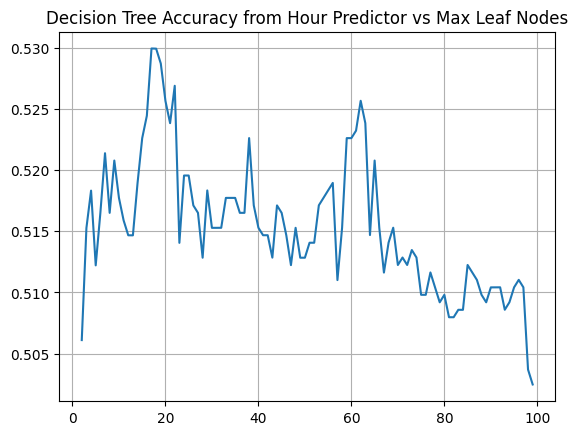

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = df[['prev_acc_diff']]
y = df['won']

accuracies = {}

for max_leaf in range(2, 100):
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    accuracies[max_leaf] = np.mean(scores)

plt.plot(accuracies.keys(), accuracies.values())
plt.grid()
plt.title("Decision Tree Accuracy from Hour Predictor vs Max Leaf Nodes")
plt.show()